# Setup and Imports

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import statsmodels.api as sm
from collections import OrderedDict

path_prefix = "./data/"

# Aufgabe 5 - Lineare Regression

         Monat  Produktion in Stück  geleistete Überstunden
0      Januar                3000.0                   200.0
1     Februar                3200.0                   250.0
2        März                2900.0                   200.0
3       April                2700.0                   150.0
4         Mai                2700.0                   150.0
5        Juni                2800.0                   150.0
6       Juli                 2600.0                   100.0
8   September                2500.0                    50.0
9     Oktober                2600.0                    70.0
10   November                2800.0                   150.0
11   Dezember                3000.0                   180.0
Korrelationskoeffizient
0.9455182188590328
                             OLS Regression Results                            
Dep. Variable:     Produktion in Stück   R-squared:                       0.894
Model:                             OLS   Adj. R-squared:                  0.8

/Users/lukaskaspras/miniconda3/envs/StatistischeMethoden/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


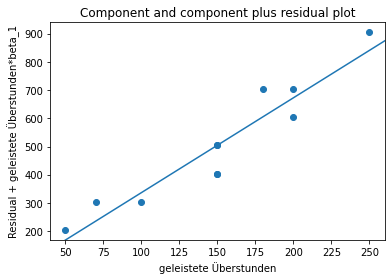

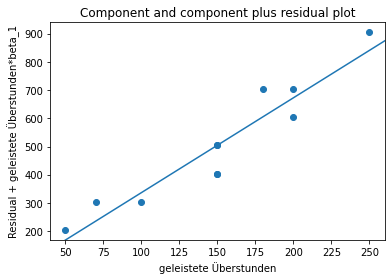

In [80]:
df_prodfunk = pd.read_excel(f"{path_prefix}Produktionsfunktion.xlsx").dropna()
df_prodfunk= df_prodfunk[(df_prodfunk != 0).all(1)]
prod = "Produktion in Stück"
hours = "geleistete Überstunden"

print(df_prodfunk)

y = df_prodfunk[prod]
X = df_prodfunk[hours]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()

print("Korrelationskoeffizient")
print(df_prodfunk[[prod, hours]].corr().loc[prod, hours])

print(model11.summary())

sm.graphics.plot_ccpr(model11, hours)

In [84]:
df_alk = pd.read_excel(f"{path_prefix}Alkoholkonsum.xlsx").dropna()
df_alk.rename(columns = {'Heart death rate':'Heart_death_rate'}, inplace = True)
death_rate = "Heart_death_rate"
w = ["Wine"]
b = ["Beer"]
l = ["Liquor"]
wb = ["Wine", "Beer"]
wl = ["Wine", "Liquor"]
bl = ["Beer", "Liquor"]
wbl = ["Wine", "Beer", "Liquor"]

combinations = [w, b, l, wb, wl, bl, wbl]
r_squared = OrderedDict()
adjusted_r_squared = OrderedDict()

for combi in combinations:

    y = df_alk[death_rate]
    X = df_alk[combi]
    X = sm.add_constant(X)
    model11 = sm.OLS(y, X).fit()
    
    r_squared["".join(combi)] = model11.rsquared
    adjusted_r_squared["".join(combi)] = model11.rsquared_adj
    
    print(f"R-Squared: {model11.rsquared}")
    print(f"Adjusted R-Squared: {model11.rsquared_adj}")      
    print(model11.summary())

print("\nR-Squared:")
for key, value in r_squared.items():
    print(key, round(value, 3))

print("\nAdjusted R-Squared:")
for key, value in adjusted_r_squared.items():
    print(key, round(value, 3))

R-Squared: 0.15580954971517513
Adjusted R-Squared: 0.05028574342957204
                            OLS Regression Results                            
Dep. Variable:       Heart_death_rate   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.477
Date:                Mon, 08 Nov 2021   Prob (F-statistic):              0.259
Time:                        17:58:49   Log-Likelihood:                -59.895
No. Observations:                  10   AIC:                             123.8
Df Residuals:                       8   BIC:                             124.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/Users/lukaskaspras/miniconda3/envs/StatistischeMethoden/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/lukaskaspras/miniconda3/envs/StatistischeMethoden/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/lukaskaspras/miniconda3/envs/StatistischeMethoden/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/lukaskaspras/miniconda3/envs/StatistischeMethoden/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=